In [ ]:
# features extract


In [ ]:
# test for one data
# load data
import numpy as np

y1 = np.loadtxt("../KNN/dataset/train3-all/10000-1")
print(y1.shape)
print(max(y1))
print(min(y1))


(8192,)
(8192, 1)
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.00608906]
 [0.00304453]
 [0.00304453]]
(8192, 1)
[[ 1.96972357e-05]
 [ 1.96972357e-05]
 [ 1.96972357e-05]
 ...
 [-6.06935961e-03]
 [-3.02483119e-03]
 [-3.02483119e-03]]
[   0    1    2 ... 8189 8190 8191]


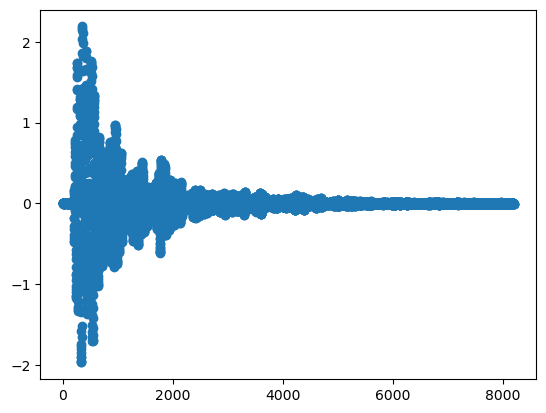

In [17]:
# test for another data
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

y2 = np.loadtxt("../KNN/dataset/process/6.crackLengthAndShapeTotal/100-1")
print(y2.shape)

pca=PCA(n_components=1)
y2=np.array(y2.reshape(-1, 1))
print(y2.shape)
print(y2)
# print(y2)
y2_pca=pca.fit_transform(y2)
print(y2_pca.shape)
print(y2_pca)

x=np.arange(8192)
print(x)
plt.scatter(x,y2_pca)



In [ ]:
# features extract
import numpy as np
from os import listdir
FileList = listdir('../KNN/dataset/train3-all/')
# 返回文件夹下文件的个数
m = len(FileList)
# print(FileList)
print(m)
for i in range(m):
    # 获得文件的名字
    fileNameStr = FileList[i]
    # 获得分类的数字
    classNumber = int(fileNameStr.split('-')[1])
    # if classNumber == 1:
    #     data = np.loadtxt(f"./dataset/rockshape/train/{fileNameStr}")
    #     # print(data)
    #     max_value = max(data)
    #     min_value = min(data)
    #     # print(min(data))
    #     # print(max_value)
    #     # print(min_value)
    #     saveArr = [max_value, min_value, 1]
    #     saveArr = np.array(saveArr, dtype=float).reshape(1, 3)
    #     print(saveArr)
    #     print(saveArr.ndim)
    #     # saveClassName = np.array([1], dtype=int)
    #     with open("./dataset/rockshape/features_extract/test1.csv", 'a+') as f:
    #         np.savetxt(f, saveArr, delimiter=',')
    #         # # np.savetxt(f,)
    #         # np.savetxt(f, saveClassName)

    #     # with open("./dataset/rockshape/features_extract/test1.csv", 'a+') as f:
    data = np.loadtxt(f"../KNN/dataset/train3-all/{fileNameStr}")
    # print(data)
    max_value = max(data)
    min_value = min(data)
    mean_value=np.mean(data)
    range_value=max_value-min_value
    # print(min(data))
    # print(max_value)
    # print(min_value)
    saveArr = [max_value, min_value, mean_value,range_value,classNumber]
    saveArr = np.array(saveArr, dtype=float).reshape(1, 5)
    print(saveArr)
    print(saveArr.ndim)
    # saveClassName = np.array([1], dtype=int)
    with open("./dataset/train3/train3.txt", 'a+') as f:
        np.savetxt(f, saveArr, delimiter=',')
        # # np.savetxt(f,)
        # np.savetxt(f, saveClassName)

    # with open("./dataset/rockshape/features_extract/test1.csv", 'a+') as f:
            

In [1]:
# -*- coding: UTF-8 -*-
import numpy as np
# import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

"""
函数说明:向量转化。

Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的向量

Modify:
    ---
"""


def vector(filename):
    # 创建向量
    returnVect = np.zeros((1, 8192))
    # print(returnVect)
    # 打开文件
    fr = open(filename)
    # 按行读取
    for i in range(8192):
        # 读一行数据
        lineStr = fr.readline().strip("\n")
        # print(lineStr)
        # 每一行的元素依次添加到returnVect中
        returnVect[0][i] = lineStr
    # 返回转换后的向量
    # print(returnVect)
    return returnVect



Labels = []
# 初始化训练的Mat矩阵,测试集
trainingFileList = listdir('../KNN/dataset/process/6.crackLengthAndShapeTotal/')
    # print(trainingFileList)
    # 返回文件夹下文件的个数
m = len(trainingFileList)
trainingMat = np.zeros((m, 8192))

def dataset():
    # 测试集的Labels
    
    # 错误的数据集
    errList = []
    # 返回trainingDigits目录下的文件名
    trainingFileList = listdir('../KNN/dataset/process/6.crackLengthAndShapeTotal/')
    # print(trainingFileList)
    # 返回文件夹下文件的个数
    m = len(trainingFileList)
    print(m)
    
    # 从文件名中解析出训练集的类别
    for i in range(m):
        # 获得文件的名字
        fileNameStr = trainingFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('-')[1])
        # 将获得的类别添加到Labels中
        Labels.append(classNumber)
        # 将每一个文件的数据存储到trainingMat矩阵中
        trainingMat[i, :] = vector(
            '../KNN/dataset/process/6.crackLengthAndShapeTotal/%s' % (fileNameStr))
        # print(i)
        
dataset()
print(trainingMat.shape)
print(len(Labels))
    

194541
(194541, 8192)
194541


In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=16)
trainingMatPAC=pca.fit_transform(trainingMat)
print(trainingMatPAC.shape)

(194541, 16)


In [ ]:
clf = SVC(C=1,kernel='rbf',gamma=0.1)

## 模型训练
clf.fit(x_train, y_train)

In [ ]:
print (clf.score(x_train, y_train)) 
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

In [ ]:
print ('decision_function:\n', clf.decision_function(x_train))
print ('\npredict:\n', clf.predict(x_train))

In [ ]:
N = 500
x1_min, x2_min = x.min()-0.2
x1_max, x2_max = x.max()+0.2

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0]  # 测试点


grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
# 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
# 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
# 测试数据集
plt.scatter(x_test[0], x_test[1], s=120,
            facecolors='none', zorder=10)     # 圈中测试集样本
# lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('SVM classification for rock', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()
